In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
import Our_Qiskit_Functions as oq
import numpy as np
import math as m
import random

In [2]:
def f(x):
    if( (x==5) or (x==12) or (x==17) or (x==21) ):
        return 1
    else:
        return 0
#=====================================
N = [2,5,8,12,13,17,21,24,30,31,32,39]
count = 0
M = []
#--------------------------
for i in np.arange(len(N)):
    if( f(N[i])==1 ):
        count = count + 1
        M.append( N[i] )
print('Solution: ',count,'\n M: ',M)

Solution:  4 
 M:  [5, 12, 17, 21]


In [3]:
marked = ['010','011','110']
Q = len(marked[0])
iters = 1
#=========================================
q = QuantumRegister(Q,name='q')
a1 = QuantumRegister(1,name='a1')
a2 = QuantumRegister(Q-2,name='a2')
qc = QuantumCircuit(q,a1,a2,name='qc')
#------------------------------------------
for j in np.arange(Q):
    qc.h( q[int(j)] )
qc.x( a1[0] )

for i in np.arange( iters ):
    for j in np.arange(len(marked)):
        M = list(marked[j])
        for k in np.arange(len(M)):
            if(M[k]=='1'):
                M[k] = 1
            else:
                M[k] = 0
        oq.Grover_Oracle(M, qc, q, a1, a2)
    oq.Grover_Diffusion(M, qc, q, a1, a2)

oq.Wavefunction(qc,systems=[Q,Q-2,1],show_systems=[True,False,False]);

0.17678  |000>   0.17678  |100>   -0.53033  |010>   -0.53033  |110>   0.17678  |001>   0.17678  |101>   -0.53033  |011>   0.17678  |111>   


In [4]:
marked = ['010','011','110']
Q = len(marked[0])
iters = 2
#=========================================
q = QuantumRegister(Q,name='q')
a1 = QuantumRegister(1,name='a1')
a2 = QuantumRegister(Q-2,name='a2')
qc = QuantumCircuit(q,a1,a2,name='qc')
#------------------------------------------
for j in np.arange(Q):
    qc.h( q[int(j)] )
qc.x( a1[0] )

qc,q,a1,a2 = oq.Multi_Grover(q,a1,a2,qc,marked,iters)

oq.Wavefunction(qc,systems=[Q,Q-2,1],show_systems=[True,False,False]);

-0.44194  |000>   -0.44194  |100>   -0.08839  |010>   -0.08839  |110>   -0.44194  |001>   -0.44194  |101>   -0.08839  |011>   -0.44194  |111>   


In [5]:
marked = ['01010','01100','00101']
Q = len(marked[0])
iters = 2
#=========================================
q = QuantumRegister(Q,name='q')
a1 = QuantumRegister(1,name='a1')
a2 = QuantumRegister(Q-2,name='a2')
qc = QuantumCircuit(q,a1,a2,name='qc')
#------------------------------------------
for j in np.arange(Q):
    qc.h( q[int(j)] )
qc.x( a1[0] )
qc,q,a1,a2 = oq.Multi_Grover(q,a1,a2,qc,marked,iters)
oq.Wavefunction(qc,systems=[Q,Q-2,1],show_systems=[True,False,False],column=True);

0.00276  |00000>   
0.00276  |10000>   
0.00276  |01000>   
0.00276  |11000>   
0.00276  |00100>   
0.00276  |10100>   
0.57729  |01100>   
0.00276  |11100>   
0.00276  |00010>   
0.00276  |10010>   
0.57729  |01010>   
0.00276  |11010>   
0.00276  |00110>   
0.00276  |10110>   
0.00276  |01110>   
0.00276  |11110>   
0.00276  |00001>   
0.00276  |10001>   
0.00276  |01001>   
0.00276  |11001>   
0.57729  |00101>   
0.00276  |10101>   
0.00276  |01101>   
0.00276  |11101>   
0.00276  |00011>   
0.00276  |10011>   
0.00276  |01011>   
0.00276  |11011>   
0.00276  |00111>   
0.00276  |10111>   
0.00276  |01111>   
0.00276  |11111>   



In [6]:
runs = 100000
Avgs = [0,0,0,0,0]
#=======================================
for r in np.arange(runs):
    Measured = []
    Trials = []
    t = 0
    while( len(Measured) != 5 ):
        Measurement = round( 0.500000001+ random.random()*5 )
        t = t + 1
        new_state = True
        for i in np.arange( len(Measured) ):
            if( Measurement == Measured[i] ):
                new_state = False
        if(new_state == True):
            Measured.append(Measurement)
            Trials.append(t)
    for i in np.arange(5):
        Avgs[i] = Avgs[i] + Trials[i]
#=======================================
for j in np.arange(5):
    Avgs[j] = round(Avgs[j]/runs,3)
    
print('Average Trials to Find Each State:   \n\n1) ', Avgs[0], '   2)',Avgs[1], '   3)',Avgs[2], '   4)',Avgs[3], '   5)',Avgs[4]); 

Average Trials to Find Each State:   

1)  1.0    2) 2.249    3) 3.919    4) 6.425    5) 11.429


In [7]:
for i in np.arange(4):
    q = QuantumRegister(2,name='q')
    qc= QuantumCircuit(q,name='qc')
    if( (i == 1) or (i == 3) ):
        qc.x( q[1] )
    if( (i == 2) or (i == 3) ):
        qc.x( q[0] )
    
    print('\n___ Initial State ___')
    oq.Wavefunction(qc)
    qc.ch( q[0],q[1] )
    print('\n___ After Control-Hadamard ___')
    oq.Wavefunction(qc)
    
    if( i <= 2):
        print('\n------------------------------------')


___ Initial State ___
1.0  |00>   

___ After Control-Hadamard ___
1.0  |00>   

------------------------------------

___ Initial State ___
1.0  |01>   

___ After Control-Hadamard ___
1.0  |01>   

------------------------------------

___ Initial State ___
1.0  |10>   

___ After Control-Hadamard ___
0.70711  |10>   0.70711  |11>   

------------------------------------

___ Initial State ___
1.0  |11>   

___ After Control-Hadamard ___
0.70711  |10>   -0.70711  |11>   


In [8]:
q = QuantumRegister(2,name='q')
a = QuantumRegister(1,name='a')
qc= QuantumCircuit(q,a,name='qc')
#--------------------------------
qc.h( q[0] )
qc.h( q[1] )
print('__ Initial State __')
oq.Wavefunction(qc,systems=[2,1],show_systems=[True,False])
qc.x( a[0] )
qc.h( a[0] )
#------------------------- Oracle
qc.barrier()
qc.x( q[1] )
qc.ccx( q[0],q[1],a[0] )
qc.x( q[1] )
#------------------------- Diffusion
qc.barrier()
qc.h( q[0] )
qc.h( q[1] )
qc.x( q[0] )
qc.x( q[1] )
qc.ccx( q[0],q[1],a[0] )
qc.x( q[0] )
qc.x( q[1] )
qc.h( q[0] )
qc.h( q[1] )
qc.barrier()
qc.h( a[0] )
qc.x( a[0] )
print('\n__ After Grovers __')
oq.Wavefunction(qc,systems=[2,1],show_systems=[True,False]);

__ Initial State __
0.5  |00>   0.5  |10>   0.5  |01>   0.5  |11>   

__ After Grovers __
-1.0  |10>   


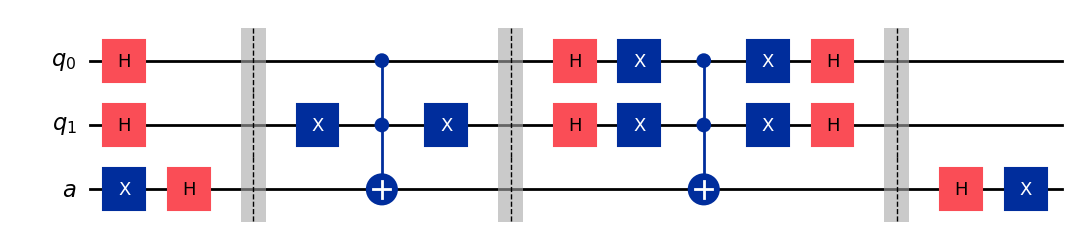

In [9]:
qc.draw('mpl')

In [10]:
c = QuantumRegister(1,name='c')
q = QuantumRegister(2,name='q')
a1 = QuantumRegister(1,name='a1')
a2 = QuantumRegister(1,name='a2')
qc= QuantumCircuit(c,q,a1,a2,name='qc')
qc.x( c[0] )
qc.ch( c[0], q[0] )
qc.ch( c[0], q[1] )
print('__ Initial State __')
oq.Wavefunction(qc,systems=[1,2,1,1],show_systems=[True,True,False,False])
qc.cx( c[0], a2[0] )
qc.ch( c[0], a2[0] )
#------------------------- Oracle
qc.barrier()
qc.cx( c[0], q[1] )
qc.ccx( q[0], q[1], a1[0] )
qc.ccx( c[0], a1[0], a2[0] )
qc.ccx( q[0], q[1], a1[0] )
qc.cx( c[0], q[1] )
#------------------------- Diffusion
qc.barrier()
qc.ch( c[0], q[0] )
qc.ch( c[0], q[1] )
qc.cx( c[0], q[0] )
qc.cx( c[0], q[1] )
qc.ccx( q[0], q[1], a1[0] )
qc.ccx( c[0], a1[0], a2[0] )
qc.ccx( q[0], q[1], a1[0] )
qc.cx( c[0], q[0] )
qc.cx( c[0], q[1] )
qc.ch( c[0], q[0] )
qc.ch( c[0], q[1] )
qc.barrier()
qc.ch( c[0], a2[0] )
qc.cx( c[0], a2[0] )
print('\n__ After c-Grovers __')
oq.Wavefunction(qc,systems=[1,2,1,1],show_systems=[True,True,False,False]);

__ Initial State __
0.5  |1>|00>   0.5  |1>|10>   0.5  |1>|01>   0.5  |1>|11>   

__ After c-Grovers __
-1.0  |1>|10>   


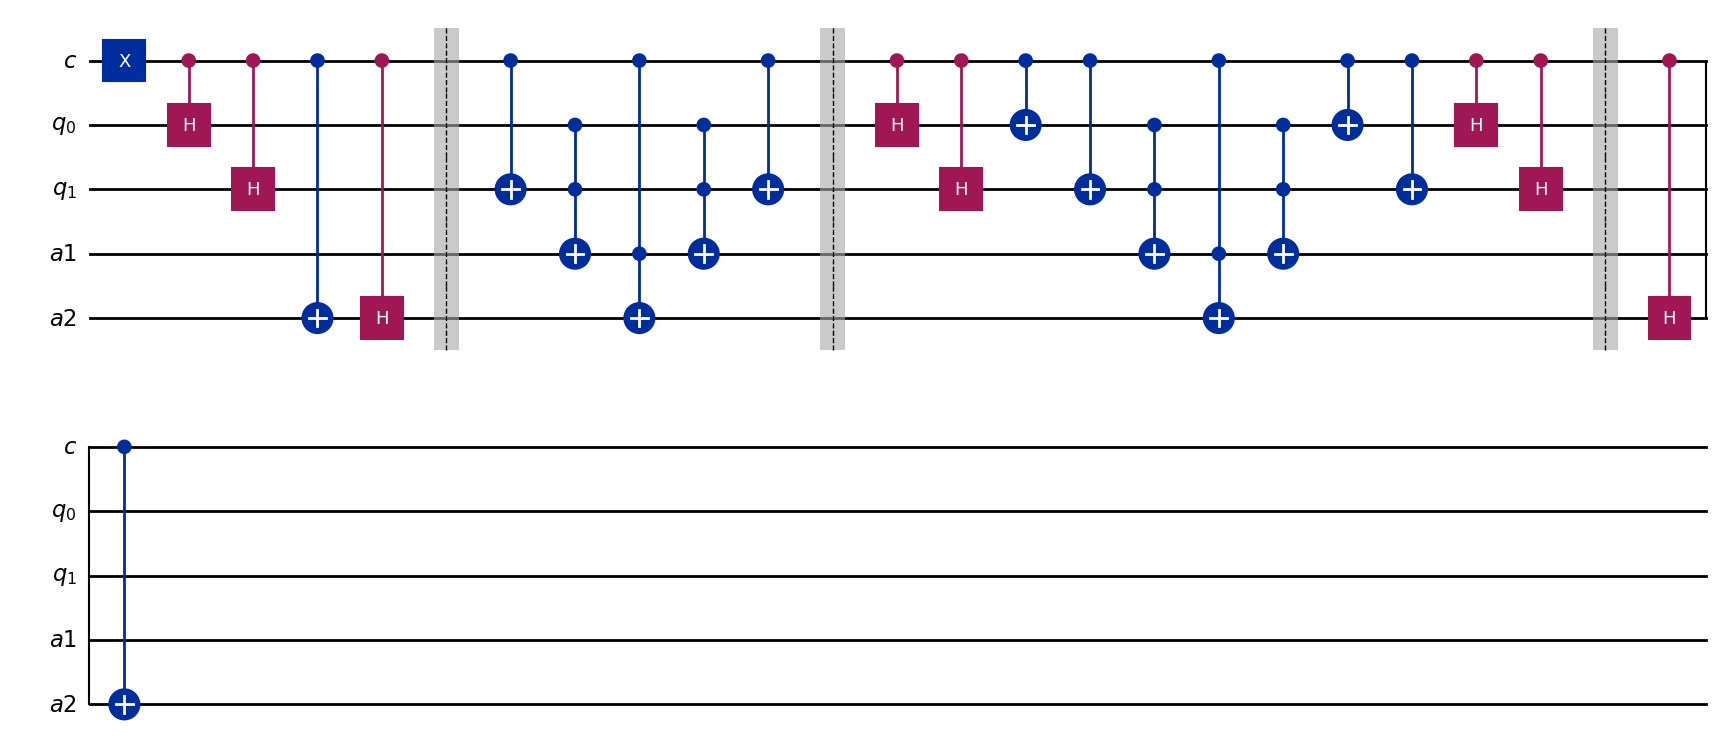

In [11]:
qc.draw('mpl')

In [12]:
q = QuantumRegister(3,name='q')
a1= QuantumRegister(1,name='a1')
a2= QuantumRegister(1,name='a2')
qc= QuantumCircuit(q,a1,a2,name='qc')
marked = [1,0,1]
for i in np.arange(3):
    qc.h( q[int(i)] )
qc.x( a1[0] )
oq.Wavefunction(qc, systems=[3,1,1], show_systems=[True,False,False])
for i in np.arange(2):
    oq.Grover_Oracle(marked, qc, q, a1, a2)
    oq.Grover_Diffusion(marked, qc, q, a1, a2)
    print('\n____ Grover Iterations: ',int(i+1),' ____')
    oq.Wavefunction(qc, systems=[3,1,1], show_systems=[True,False,False])

0.35355  |000>   0.35355  |100>   0.35355  |010>   0.35355  |110>   0.35355  |001>   0.35355  |101>   0.35355  |011>   0.35355  |111>   

____ Grover Iterations:  1  ____
-0.17678  |000>   -0.17678  |100>   -0.17678  |010>   -0.17678  |110>   -0.17678  |001>   -0.88388  |101>   -0.17678  |011>   -0.17678  |111>   

____ Grover Iterations:  2  ____
-0.08839  |000>   -0.08839  |100>   -0.08839  |010>   -0.08839  |110>   -0.08839  |001>   0.97227  |101>   -0.08839  |011>   -0.08839  |111>   


In [13]:
marked = ['101','110','111']
Q = len(marked[0])
iters = 1
#=========================================
q = QuantumRegister(Q,name='q')
a1 = QuantumRegister(1,name='a1')
a2 = QuantumRegister(Q-2,name='a2')
qc = QuantumCircuit(q,a1,a2,name='qc')
#------------------------------------------
for j in np.arange(Q):
    qc.h( q[int(j)] )
qc.x( a1[0] )
qc,q,a1,a2 = oq.Multi_Grover(q,a1,a2,qc,marked,iters)
print('_____ 1 Grover Iteration M = 3 _____ ')
oq.Wavefunction(qc,systems=[Q,Q-2,1],show_systems=[True,False,False]);

_____ 1 Grover Iteration M = 3 _____ 
0.17678  |000>   0.17678  |100>   0.17678  |010>   -0.53033  |110>   0.17678  |001>   -0.53033  |101>   0.17678  |011>   -0.53033  |111>   


In [14]:
marked = ['10111','11000']
Q = len(marked[0])
N = 2**Q
M = len(marked)
iters = int(round( (m.pi/2 - np.arctan( m.sqrt( M/(N-M) ) ) ) / ( 2 * np.arcsin( m.sqrt(M/N) ) ) ) )
print('N: ',N,' M: ',M,' Optimal Iterations: ',iters,'\n\n')
#=========================================
q = QuantumRegister(Q,name='q')
a1 = QuantumRegister(1,name='a1')
a2 = QuantumRegister(Q-2,name='a2')
qc = QuantumCircuit(q,a1,a2,name='qc')
#------------------------------------------
for j in np.arange(Q):
    qc.h( q[int(j)] )
qc.x( a1[0] )

qc,q,a1,a2 = oq.Multi_Grover(q,a1,a2,qc,marked,iters)
oq.Wavefunction(qc,systems=[Q,Q-2,1],show_systems=[True,False,False],column=True);

N:  32  M:  2  Optimal Iterations:  3 


0.03591  |00000>   
0.03591  |10000>   
0.03591  |01000>   
-0.6933  |11000>   
0.03591  |00100>   
0.03591  |10100>   
0.03591  |01100>   
0.03591  |11100>   
0.03591  |00010>   
0.03591  |10010>   
0.03591  |01010>   
0.03591  |11010>   
0.03591  |00110>   
0.03591  |10110>   
0.03591  |01110>   
0.03591  |11110>   
0.03591  |00001>   
0.03591  |10001>   
0.03591  |01001>   
0.03591  |11001>   
0.03591  |00101>   
0.03591  |10101>   
0.03591  |01101>   
0.03591  |11101>   
0.03591  |00011>   
0.03591  |10011>   
0.03591  |01011>   
0.03591  |11011>   
0.03591  |00111>   
-0.6933  |10111>   
0.03591  |01111>   
0.03591  |11111>   



In [15]:
E_plus = [ 1.0j/m.sqrt(10),1.0j/m.sqrt(10),1.0j/m.sqrt(10),1.0/m.sqrt(6),
          1.0j/m.sqrt(10),1.0/m.sqrt(6),1.0j/m.sqrt(10),1.0/m.sqrt(6) ]
#=========================================================================
q = QuantumRegister(3,name='q')
qc= QuantumCircuit(q,name='qc')
#------------------------------
qc.initialize( E_plus, q )
oq.Wavefunction( qc );

0.31623j |000>   0.31623j |100>   0.31623j |010>   0.40825  |110>   0.31623j |001>   0.40825  |101>   0.31623j |011>   0.40825  |111>   


In [16]:
Marked = ['101','110','111']
Q = len(Marked[0])
E_plus = [ 1.0j/m.sqrt(10),1.0j/m.sqrt(10),1.0j/m.sqrt(10),1.0/m.sqrt(6),
          1.0j/m.sqrt(10),1.0/m.sqrt(6),1.0j/m.sqrt(10),1.0/m.sqrt(6) ]
#========================================================================
q = QuantumRegister(Q,name='q')
u = QuantumRegister(Q,name='u')
a1 = QuantumRegister(Q-1,name='a1')
a2 = QuantumRegister(1,name='a2')
c = ClassicalRegister(Q,name='c')
qc= QuantumCircuit(q,u,a1,a2,c,name='qc')
#------------------------------------
qc.h( q[0] )
qc.h( q[1] )
qc.h( q[2] )
qc.initialize(E_plus,u)
qc.x( a2[0] )
qc.h( a2[0] )
#-------------------------
for i in np.arange(Q):
    for j in np.arange(2**i):
        oq.C_Grover(qc,q[int(3-(i+1))],u,a1,a2,Marked,proper=True)
#-------------------------
qc.h( a2[0] )
qc.x( a2[0] )
oq.QFT_dgr( qc,q,3,swap=True )
#--------------------------
qc.measure(q,c)
oq.Measurement( qc, shots=10000 );

7029|010>   1687|001>   434|011>   280|000>   149|111>   175|100>   129|101>   117|110>   


In [17]:
#qc.draw('mpl')

In [18]:
Marked = ['101','110','111']
Q = len(Marked[0])
E_minus = [ -1.0j/m.sqrt(10),-1.0j/m.sqrt(10),-1.0j/m.sqrt(10),1.0/m.sqrt(6),
           -1.0j/m.sqrt(10),1.0/m.sqrt(6),-1.0j/m.sqrt(10),1.0/m.sqrt(6) ]
#========================================================================
q = QuantumRegister(Q,name='q')
u = QuantumRegister(Q,name='u')
a1 = QuantumRegister(Q-1,name='a1')
a2 = QuantumRegister(1,name='a2')
c = ClassicalRegister(Q,name='c')
qc= QuantumCircuit(q,u,a1,a2,c,name='qc')
#------------------------------------
qc.h( q[0] )
qc.h( q[1] )
qc.h( q[2] )
qc.initialize(E_minus,u)
qc.x( a2[0] )
qc.h( a2[0] )
#-------------------------
for i in np.arange(Q):
    for j in np.arange(2**i):
        oq.C_Grover(qc,q[int(3-(i+1))],u,a1,a2,Marked,proper=True)
#-------------------------
qc.h( a2[0] )
qc.x( a2[0] )
oq.QFT_dgr( qc,q,3,swap=True )
#--------------------------
qc.measure(q,c)
oq.Measurement( qc, shots=10000 );

7056|110>   474|101>   1602|111>   284|000>   129|011>   204|100>   111|010>   140|001>   


In [19]:
theta_vec = [0.79,-0.79]
for i in np.arange(len(theta_vec)):
    theta = theta_vec[i]
    n = 3
#=====================================
    q1 = QuantumRegister(n,name='q1')
    q2 = QuantumRegister(1,name='q2')
    c = ClassicalRegister(n,name='c')
    qc = QuantumCircuit(q1,q2,c,name='qc')
#--------------------------------------
    for i in np.arange(n):
        qc.h(q1[int(i)])
    qc.x( q2[0] )
    phi = 2*m.pi*theta
    for j in np.arange(n):
        for k in np.arange(2**j):
            qc.cp( phi, q1[int(n-1-j)], q2[0] )
    oq.QFT_dgr( qc,q1,n,swap=True )
#--------------------------------------
    print('\n___ QPE for Theta = ',theta,' ___')
    qc.measure(q1,c)
    oq.Measurement( qc, shots=10000, systems=[n,2] )


___ QPE for Theta =  0.79  ___
7072|110>   1584|111>   141|001>   118|011>   121|010>   484|101>   182|100>   298|000>   

___ QPE for Theta =  -0.79  ___
7121|010>   1593|001>   117|101>   150|111>   443|011>   199|100>   277|000>   100|110>   


In [20]:
Precision = 6
Grover_Size = 4
#---------------
D = 2**Precision
N = 2**Grover_Size
M = int(1 + (2**Grover_Size-2)*random.random() )
#M = 1

Marked = []
for m1 in np.arange(2**Grover_Size):
    Marked.append( oq.Binary(int(m1),2**Grover_Size) )
random.shuffle(Marked)
for m2 in np.arange( (int(2**Grover_Size)-M) ):
    Marked.pop()

#Marked.append(oq.Binary(1,2**Grover_Size))

#=========================================
q = QuantumRegister(Precision,name='q')
u = QuantumRegister(Grover_Size,name='u')
a1 = QuantumRegister(Grover_Size-1,name='a1')
a2 = QuantumRegister(1,name='a2')
c = ClassicalRegister(Precision,name='c')
qc= QuantumCircuit(q,u,a1,a2,c,name='qc')
#-----------------------------------------
for p in np.arange(Precision):
    qc.h( q[int(p)] )
for g in np.arange(Grover_Size):
    qc.h( u[int(g)] )
qc.x( a2[0] )
qc.h( a2[0] )
qc.barrier()
#-------------------------

for i in np.arange(Precision):
    ctrlQubit = q[int(Precision-(i+1))]
    for _ in np.arange(2**i):
        oq.C_Grover(qc,ctrlQubit,u,a1,a2,Marked,proper=True)

#-------------------------
qc.barrier()
qc.h( a2[0] )
qc.x( a2[0] )
qc.barrier()
oq.QFT_dgr( qc,q,Precision,swap=True )
qc.measure(q,c)

trials=10000
Meas = oq.Measurement( qc, shots=trials, return_M=True, print_M=True )
#-------------------------
print('\nCorrect M: ',len(Marked),' \u03B8: ',round(2*np.arcsin(m.sqrt(len(Marked)/(2**Grover_Size)))/(2*m.pi),5))
C,S = oq.Most_Probable(Meas,1)

theta_QPE = oq.From_Binary(S[0])/D

print('\nMost Probable State: |'+str(S[0])+'> ----> \u03B8: ',round(theta_QPE,4))

if( theta_QPE >= 0.5 ):
    theta_QPE = 1 - theta_QPE
    print('\nInterpretting Measurement as 1 - \u03B8: ',round(theta_QPE,4),' Corresponding M: ',int(round(2**Grover_Size * np.sin(m.pi * theta_QPE)**2))) 
else:
    print('\nInterpretting Measurement as \u03B8: ',round(theta_QPE,4),' Corresponding M: ',int(round(2**Grover_Size * np.sin(m.pi * theta_QPE)**2)))


6|110011>   62|001000>   1|101010>   4|001111>   4772|001001>   4745|110111>   96|110110>   13|000110>   4|010000>   25|110101>   5|001101>   4|110000>   19|001011>   85|001010>   2|110001>   7|001100>   3|101111>   1|000011>   57|111000>   6|001110>   3|110010>   3|111100>   15|111001>   15|000111>   1|010001>   14|110100>   5|111110>   1|011101>   1|101000>   7|000101>   7|111010>   1|000010>   1|000000>   1|111011>   1|100100>   1|100000>   1|010101>   2|000100>   1|111111>   1|000001>   1|011000>   

Correct M:  3  θ:  0.14255

Most Probable State: |001001> ----> θ:  0.1406

Interpretting Measurement as θ:  0.1406  Corresponding M:  3
